# Donor Choose : KNN

In [1]:
import os

os.chdir('E:\Datasets\DonorChoose')

In [2]:
import pandas as pd

In [3]:
donor = pd.read_csv('cleandonor2.csv')

donor.head(2)
# We removed the redundant features that were taking up space and created a new .csv file

,teacher_prefix,school_state,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,price,quantity,cleanEssay
0,Mrs.,IN,Educational Support for English Learners at Home,My students need opportunities to practice beg...,0,0,Literacy-Language,ESL Literacy,154.6,23,students english learners working english seco...
1,Mr.,FL,Wanted: Projector for Hungry Learners,My students need a projector to help with view...,7,1,History-Civics Health-Sports,Civics-Government TeamSports,299.0,1,students arrive school eager learn polite gene...


### Removing Stop Words from title

In [4]:
# We are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [5]:
from tqdm import tqdm
ftitle = [] 

for sen in tqdm( donor['project_title'].values ): 
    strY = " "

    for w in sen.lower().split():
        if w not in stopwords:
            strY = strY + w + " "

    ftitle.append( strY.strip() )

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 53170.83it/s]


In [6]:
donor.drop(['project_title'], axis=1, inplace=True)
donor['cleanTitle'] = ftitle

In [7]:
donor.head(2)

,teacher_prefix,school_state,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,price,quantity,cleanEssay,cleanTitle
0,Mrs.,IN,My students need opportunities to practice beg...,0,0,Literacy-Language,ESL Literacy,154.6,23,students english learners working english seco...,educational support english learners home
1,Mr.,FL,My students need a projector to help with view...,7,1,History-Civics Health-Sports,Civics-Government TeamSports,299.0,1,students arrive school eager learn polite gene...,wanted: projector hungry learners


In [8]:
donor.shape

(109248, 11)

### Handling NAN values in Teacher Prefix

In [9]:
nan = donor[ donor['teacher_prefix'].isnull() ]
nan

,teacher_prefix,school_state,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,price,quantity,cleanEssay,cleanTitle
7820,NaN,CA,My students need a classroom laptop that is ju...,1,1,Literacy-Language Math-Science,Literature-Writing Mathematics,910.87,2,children anna yates elementary school expressi...,1:7 increasing tech decrease achievement gaps
30368,NaN,SC,My students need 5 iPads for STEM stations.,0,1,Literacy-Language,Literature-Writing,285.86,16,within next 20 years every job involve form te...,ipads stem stations
57654,NaN,PA,My students need a Smart Document Camera to en...,0,1,Literacy-Language Math-Science,Literacy Mathematics,145.29,2,students robertsdale elementary live low socio...,document camera


In [10]:
donor.iloc[7820, 0] = "Missing" 
donor.iloc[30368, 0] = "Missing" 
donor.iloc[57654, 0] = "Missing" 

In [11]:
nan = donor[ donor['teacher_prefix'].isnull() ]
nan

,teacher_prefix,school_state,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,price,quantity,cleanEssay,cleanTitle


## Only considering 30k data points to avoid memory issues

In [12]:
donor = donor[0 : 30000]

In [13]:
donor.shape

(30000, 11)

In [14]:
Y = donor['project_is_approved']

len( Y )  # Y = label i.e; Project is approved ( 0 or 1 )

30000

In [15]:
donor.drop( 'project_is_approved', axis=1, inplace=True )

In [16]:
donor.shape

(30000, 10)

In [17]:
X = donor  # X = our features 

In [18]:
X.head(2)

,teacher_prefix,school_state,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategory,price,quantity,cleanEssay,cleanTitle
0,Mrs.,IN,My students need opportunities to practice beg...,0,Literacy-Language,ESL Literacy,154.6,23,students english learners working english seco...,educational support english learners home
1,Mr.,FL,My students need a projector to help with view...,7,History-Civics Health-Sports,Civics-Government TeamSports,299.0,1,students arrive school eager learn polite gene...,wanted: projector hungry learners


## Splitting Data

In [19]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( X, Y, test_size = 0.33, stratify = Y) # Spliting into Test and Train

# stratify : we need to pass array containing class label as an argument to stratify

xtrain, xcv, ytrain, ycv = train_test_split( xtrain, ytrain, test_size = 0.33, stratify = ytrain )

In [20]:
print( xtrain.shape )
print( xcv.shape )
print( xtest.shape )

print( ytrain.shape )
print( ycv.shape )
print( ytest.shape )

(13467, 10)
(6633, 10)
(9900, 10)
(13467,)
(6633,)
(9900,)


In [21]:
xtrain.head(2)

,teacher_prefix,school_state,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategory,price,quantity,cleanEssay,cleanTitle
5567,Ms.,OH,"My students need snacks for breakfast, lunch, ...",0,SpecialNeeds,SpecialNeeds,267.78,11,special needs students high need supplies work...,brain snacks
1808,Mrs.,TN,My students need STEM station kits. These kit...,36,Math-Science,Mathematics,433.05,2,help us stem way success kindergarten time imm...,help us stem learning!


# Creating Data Matrix

### Essay BOW

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer( min_df = 10, ngram_range=(1,4) )
# ngram_range : The lower and upper boundary of the range of n-values for different n-grams to be extracted.

vect.fit( xtrain['cleanEssay'].values )
# vect.fit( text ): Means that internally it is only learning the vocabulary of `Text` i.e. unique n-grams

# THE VOCABULARY SHOULD BUILT ONLY WITH THE WORDS OF TRAIN DATA

xtrEssayBOW = vect.transform( xtrain['cleanEssay'].values ) 
xcvEssayBOW = vect.transform( xcv['cleanEssay'].values ) 
xteEssayBOW = vect.transform( xtest['cleanEssay'].values )

In [23]:
print( xtrEssayBOW.shape )
print( xcvEssayBOW.shape )
print( xteEssayBOW.shape )

(13467, 37810)
(6633, 37810)
(9900, 37810)


In [24]:
xtrEssayBOW

<13467x37810 sparse matrix of type '<class 'numpy.int64'>'
	with 2344605 stored elements in Compressed Sparse Row format>

### Project title BOW

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer( min_df = 10, ngram_range = (1,4) )

vect.fit( xtrain['cleanTitle'].values )

xtrTitleBOW = vect.transform( xtrain['cleanTitle'].values )
xcvTitleBOW = vect.transform( xcv['cleanTitle'].values )
xteTitleBOW = vect.transform( xtest['cleanTitle'].values )

print( xtrTitleBOW.shape )
print( xcvTitleBOW.shape )
print( xteTitleBOW.shape )

(13467, 1051)
(6633, 1051)
(9900, 1051)


### Essay TFIDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tfidfvect = TfidfVectorizer( min_df = 10 )
tfidfvect.fit( xtrain['cleanEssay'].values )

xtrEssayTFIDF = tfidfvect.transform( xtrain['cleanEssay'].values )
xcvEssayTFIDF = tfidfvect.transform( xcv['cleanEssay'].values )
xteEssayTFIDF = tfidfvect.transform( xtest['cleanEssay'].values )

print( xtrEssayTFIDF.shape )
print( xcvEssayTFIDF.shape )
print( xteEssayTFIDF.shape )

(13467, 7029)
(6633, 7029)
(9900, 7029)


### Essay Word2Vec

In [27]:
# Function Creating a list that contains all the words in the data column

def stow( data ):
    sentence = []

    for sen in tqdm( data.values ):
        fsentence = []
    
        for w in sen.split():
            for cw in w.split():
            
                if cw.isalpha():
                    fsentence.append( cw.lower() )
                else:
                    continue
        sentence.append( fsentence )
    return sentence

In [28]:
xtrw = stow( xtrain['cleanEssay'] ) # List of words for xtrain

100%|██████████████████████████████████████████████████████████████████████████| 13467/13467 [00:01<00:00, 9705.20it/s]


In [29]:
print( len( xtrw ) )

import gensim

xtrmodel = gensim.models.Word2Vec( xtrw, min_count = 5, size =50, workers = 4 )
# min_count : If a word dosent apper more then the value assigned do't construct w2v for it
# size: dimension of vector to be constructed  ( 100 - 300 most cases )
# workers: If you hav a multi cores you can set it to 4 for performence

13467


In [30]:
xtrwords = list( xtrmodel.wv.vocab )
len( xtrwords )

10013

In [31]:
# For Cross validation

xcvw = stow( xcv['cleanEssay'] )

print( len( xcvw ) )

import gensim

xcvmodel = gensim.models.Word2Vec( xcvw, min_count = 5, size =50, workers = 4 )

xcvwords = list( xcvmodel.wv.vocab )
len( xcvwords )

100%|███████████████████████████████████████████████████████████████████████████| 6633/6633 [00:00<00:00, 11855.19it/s]


6633


7441

In [32]:
# For Test

xtew = stow( xtest['cleanEssay'] )

print( len( xtew ) )

import gensim

xtemodel = gensim.models.Word2Vec( xtew, min_count = 5, size =50, workers = 4 )

xtewords = list( xtemodel.wv.vocab )
len( xtewords )

100%|███████████████████████████████████████████████████████████████████████████| 9900/9900 [00:00<00:00, 11076.32it/s]


9900


8862

### Essay Avg Word 2 Vec

In [33]:
import numpy as np


def avgw2v( data, words, model ):
    sentV = [] # average word 2 vec for each essay is stored in this

    for sent in tqdm( data ):
    
        svec = np.zeros(50)  # creates a np array with 50 0's we took 50 here cause we took 50 as our size in Word2Vec model
        cnw = 0
    
        for w in sent:
            if w in words:
                vec = model.wv[ w ]  # Computing word 2 vec
                svec += vec     # Add it to the svec
                cnw += 1
            
        if cnw != 0:        
            svec /= cnw  # Averaging with the count of number of words with valid vector in the Essay
        sentV.append( svec )
    
    return sentV

In [34]:
xtrAW2V = np.asarray( avgw2v( xtrw, xtrwords, xtrmodel ) )

100%|███████████████████████████████████████████████████████████████████████████| 13467/13467 [01:27<00:00, 142.97it/s]


In [35]:
xtrAW2V[20]

array([ 1.06366025,  0.7290977 , -0.24385957, -0.67806055, -0.07830621,
        0.35779306, -0.50996476,  0.24522405,  0.45867412,  0.10788751,
       -0.49503898, -0.04192829,  0.50226089, -0.39514306, -0.38378569,
       -0.6370759 , -0.54489195, -0.80532306,  0.81731869,  0.90831139,
        0.24914087, -0.22633288, -0.22406234,  0.20649182,  0.19644526,
        0.34599638, -0.4037781 ,  0.49821852,  0.28372414,  0.77013516,
        0.70384943,  0.07098941,  0.29071842, -0.23406341,  0.60041102,
        0.03949004, -0.13767749, -0.24316004,  0.15210738,  0.6418768 ,
        0.64696533, -0.13532068, -0.50164849,  0.09989093, -0.48384338,
        0.20149416, -0.04165731, -1.24596729,  0.07935168,  0.88661368])

In [36]:
xcvAW2V = np.asarray( avgw2v( xcvw, xcvwords, xcvmodel ) )

100%|█████████████████████████████████████████████████████████████████████████████| 6633/6633 [00:42<00:00, 156.42it/s]


In [37]:
xcvAW2V.shape

(6633, 50)

In [38]:
xteAW2V = np.asarray( avgw2v( xtew, xtewords, xtemodel ) )

100%|█████████████████████████████████████████████████████████████████████████████| 9900/9900 [00:49<00:00, 200.37it/s]


In [39]:
xteAW2V.shape

(9900, 50)

### Essay TFIDF WW2V

In [40]:
print( tfidfvect.get_feature_names()[1000:1020] )
len( tfidfvect.get_feature_names() )

['carry', 'carrying', 'cars', 'cart', 'cartridge', 'cartridges', 'carts', 'case', 'caseload', 'cases', 'cash', 'cassette', 'cast', 'cat', 'catalog', 'catalyst', 'catch', 'catching', 'category', 'cater']


7029

In [41]:
essayFeatures = tfidfvect.get_feature_names()  # Tf idf words/ col names

In [42]:
def ww2v( data, model, TFIDF, feat = essayFeatures ):
    
    essayWw2v = []  # the Tfidf weighted w2v for each sentence is stored here
    row = 0

    for sent in tqdm( data ):
        sv = np.zeros( 50 )  # as word vectors are of zero length
        ws = 0  # ws : weight sum, num of words with a valid vector in the sentence/review

        for w in sent:      

            try:
                vec = model.wv[ w ]
                tfidf = TFIDF[ row, feat.index( w ) ]
                # dicti[w] = idf value of word in whole courpus
                # sent.count(w) = tf values of word in this review

                sv += ( vec * tfidf )
                ws += tfidf

            except:
                pass

        if ws != 0:
            sv /= ws
        essayWw2v.append( sv )
        row += 1

    return essayWw2v

In [43]:
xtrWW2V = np.asarray( ww2v( xtrw, xtrmodel, xtrEssayTFIDF ) )

100%|████████████████████████████████████████████████████████████████████████████| 13467/13467 [04:30<00:00, 49.74it/s]


In [44]:
xtrWW2V.shape

(13467, 50)

In [45]:
xcvWW2V = np.asarray( ww2v( xcvw, xcvmodel, xcvEssayTFIDF ) )

100%|██████████████████████████████████████████████████████████████████████████████| 6633/6633 [03:25<00:00, 32.21it/s]


In [46]:
xteWW2V = np.asarray( ww2v( xtew, xtemodel, xteEssayTFIDF ) )

100%|██████████████████████████████████████████████████████████████████████████████| 9900/9900 [03:30<00:00, 46.98it/s]


### Project Title TFIDF

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tfidfvect = TfidfVectorizer( min_df=10 )
tfidfvect.fit( xtrain['cleanTitle'].values )

xtrTitleTFIDF = tfidfvect.transform( xtrain['cleanTitle'].values )
xcvTitleTFIDF = tfidfvect.transform( xcv['cleanTitle'].values )
xteTitleTFIDF = tfidfvect.transform( xtest['cleanTitle'].values )

print( xtrTitleTFIDF.shape )
print( xcvTitleTFIDF.shape )
print( xteTitleTFIDF.shape )

(13467, 793)
(6633, 793)
(9900, 793)


### Title Word2 vec

In [48]:
# For Train

xtrTitlew = stow( xtrain['cleanTitle'] )  # stow : is a defined by me that coverts a list of sentences to words

print( len( xtrTitlew ) )

import gensim

xtrTitlemodel = gensim.models.Word2Vec( xtrTitlew, min_count = 5, size =50, workers = 4 )

xtrTitlewords = list( xtrTitlemodel.wv.vocab )
len( xtrTitlewords )

100%|████████████████████████████████████████████████████████████████████████| 13467/13467 [00:00<00:00, 210985.00it/s]


13467


1180

In [49]:
# For Cross Validation

xcvTitlew = stow( xcv['cleanTitle'] )

print( len( xcvTitlew ) )

import gensim

xcvTitlemodel = gensim.models.Word2Vec( xcvTitlew, min_count = 5, size =50, workers = 4 )

xcvTitlewords = list( xcvTitlemodel.wv.vocab )
len( xcvTitlewords )

100%|██████████████████████████████████████████████████████████████████████████| 6633/6633 [00:00<00:00, 289197.70it/s]


6633


681

In [50]:
# For Test

xteTitlew = stow( xtest['cleanTitle'] )

print( len( xteTitlew ) )

import gensim

xteTitlemodel = gensim.models.Word2Vec( xteTitlew, min_count = 5, size =50, workers = 4 )

xteTitlewords = list( xteTitlemodel.wv.vocab )
len( xteTitlewords )

100%|███████████████████████████████████████████████████████████████████████████| 9900/9900 [00:00<00:00, 43922.39it/s]


9900


933

### Title Avg Word 2 vec

In [51]:
# For Train

xtrTitleAW2V = np.asarray( avgw2v( xtrTitlew, xtrTitlewords, xtrTitlemodel ) )

100%|█████████████████████████████████████████████████████████████████████████| 13467/13467 [00:00<00:00, 17824.89it/s]


In [52]:
xtrTitleAW2V.shape

(13467, 50)

In [53]:
# For Cross validation

xcvTitleAW2V = np.asarray( avgw2v( xcvTitlew, xcvTitlewords, xcvTitlemodel ) )

100%|███████████████████████████████████████████████████████████████████████████| 6633/6633 [00:00<00:00, 27593.15it/s]


In [54]:
xcvTitleAW2V.shape

(6633, 50)

In [55]:
# For Test

xteTitleAW2V = np.asarray( avgw2v( xteTitlew, xteTitlewords, xteTitlemodel ) )

100%|███████████████████████████████████████████████████████████████████████████| 9900/9900 [00:00<00:00, 27762.70it/s]


In [56]:
xteTitleAW2V.shape

(9900, 50)

### Title Weighted Word 2 vec

In [57]:
print( tfidfvect.get_feature_names()[0:30] )
len( tfidfvect.get_feature_names() )

['16', '1st', '2016', '2017', '21st', '2nd', '3d', '3rd', '4th', '5th', 'academic', 'access', 'action', 'active', 'activities', 'activity', 'add', 'adding', 'adventure', 'adventures', 'again', 'age', 'ahead', 'air', 'algebra', 'alive', 'all', 'aloud', 'alouds', 'alternative']


793

In [58]:
titlefeatures = tfidfvect.get_feature_names()

In [59]:
xtrTitleWW2V = np.asarray( ww2v( xtrTitlew, xtrTitlemodel, xtrTitleTFIDF, titlefeatures ) )

100%|██████████████████████████████████████████████████████████████████████████| 13467/13467 [00:02<00:00, 6496.12it/s]


In [60]:
xtrTitleWW2V.shape

(13467, 50)

In [61]:
xcvTitleWW2V = np.asarray( ww2v( xcvTitlew, xcvTitlemodel, xcvTitleTFIDF, titlefeatures ) )

100%|████████████████████████████████████████████████████████████████████████████| 6633/6633 [00:00<00:00, 9004.83it/s]


In [62]:
xcvTitleWW2V.shape

(6633, 50)

In [63]:
xteTitleWW2V = np.asarray( ww2v( xteTitlew, xteTitlemodel, xteTitleTFIDF, titlefeatures ) )

100%|████████████████████████████████████████████████████████████████████████████| 9900/9900 [00:01<00:00, 6328.71it/s]


In [64]:
xteTitleWW2V.shape

(9900, 50)

### State

In [65]:
vectorizer = CountVectorizer()

vectorizer.fit( xtrain['school_state'].values )

xtrState = vectorizer.transform( xtrain['school_state'].values )
xcvState = vectorizer.transform( xcv['school_state'].values )
xteState = vectorizer.transform( xtest['school_state'].values )

In [66]:
print( xtrState.shape )
print( xcvState.shape )
print( xteState.shape )

(13467, 51)
(6633, 51)
(9900, 51)


In [67]:
print( vectorizer.get_feature_names() )

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### Teacher Prefix

In [68]:
vectorizer = CountVectorizer()

vectorizer.fit( xtrain['teacher_prefix'].values )

xtrPrefix = vectorizer.transform( xtrain['teacher_prefix'].values )
xcvPrefix = vectorizer.transform( xcv['teacher_prefix'].values )
xtePrefix = vectorizer.transform( xtest['teacher_prefix'].values )

In [69]:
print( xtrPrefix.shape )
print( xcvPrefix.shape )
print( xtePrefix.shape )

(13467, 4)
(6633, 4)
(9900, 4)


In [70]:
print( vectorizer.get_feature_names() )

['mr', 'mrs', 'ms', 'teacher']


### Price

In [71]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['price'].values.reshape(-1,1) )

xtrPrice = norm.transform( xtrain['price'].values.reshape(-1,1) )
xcvPrice = norm.transform( xcv['price'].values.reshape(-1,1) )
xtePrice = norm.transform( xtest['price'].values.reshape(-1,1) )

In [72]:
print( xtrPrice.shape )
print( xcvPrice.shape )
print( xtePrice.shape )

(13467, 1)
(6633, 1)
(9900, 1)


# Merging features

### Set 1

In [73]:
from scipy.sparse import hstack

xtr1 = hstack(( xtrEssayBOW, xtrTitleBOW, xtrState, xtrPrefix, xtrPrice )).tocsr()
xcv1 = hstack(( xcvEssayBOW, xcvTitleBOW, xcvState, xcvPrefix, xcvPrice )).tocsr()
xte1 = hstack(( xteEssayBOW, xteTitleBOW, xteState, xtePrefix, xtePrice )).tocsr()

print( xtr1.shape, ytrain.shape )
print( xcv1.shape, ycv.shape )
print( xte1.shape, ytest.shape )

(13467, 38917) (13467,)
(6633, 38917) (6633,)
(9900, 38917) (9900,)


### Set 2

In [74]:
xtr2 = hstack(( xtrEssayTFIDF, xtrTitleTFIDF, xtrState, xtrPrefix, xtrPrice )).tocsr()
xcv2 = hstack(( xcvEssayTFIDF, xcvTitleTFIDF, xcvState, xcvPrefix, xcvPrice )).tocsr()
xte2 = hstack(( xteEssayTFIDF, xteTitleTFIDF, xteState, xtePrefix, xtePrice )).tocsr()

print( xtr2.shape, ytrain.shape )
print( xcv2.shape, ycv.shape )
print( xte2.shape, ytest.shape )

(13467, 7878) (13467,)
(6633, 7878) (6633,)
(9900, 7878) (9900,)


### Set 3

In [75]:
xtr3 = hstack(( xtrAW2V, xtrTitleAW2V, xtrState, xtrPrefix, xtrPrice )).tocsr()
xcv3 = hstack(( xcvAW2V, xcvTitleAW2V, xcvState, xcvPrefix, xcvPrice )).tocsr()
xte3 = hstack(( xteAW2V, xteTitleAW2V, xteState, xtePrefix, xtePrice )).tocsr()

print( xtr3.shape, ytrain.shape )
print( xcv3.shape, ycv.shape )
print( xte3.shape, ytest.shape )

(13467, 156) (13467,)
(6633, 156) (6633,)
(9900, 156) (9900,)


### Set 4

In [76]:
xtr4 = hstack(( xtrWW2V, xtrTitleWW2V, xtrState, xtrPrefix, xtrPrice )).tocsr()
xcv4 = hstack(( xcvWW2V, xcvTitleWW2V, xcvState, xcvPrefix, xcvPrice )).tocsr()
xte4 = hstack(( xteWW2V, xteTitleWW2V, xteState, xtePrefix, xtePrice )).tocsr()

print( xtr4.shape, ytrain.shape )
print( xcv4.shape, ycv.shape )
print( xte4.shape, ytest.shape )

(13467, 156) (13467,)
(6633, 156) (6633,)
(9900, 156) (9900,)


## Applying KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [78]:

neigh = KNeighborsClassifier()

parameters = { 'n_neighbors' : [ 1, 5, 10, 15, 21, 31, 41, 51 ] } # n_neighbors = k i.e; the Hyperparameter here

classifier = GridSearchCV( neigh, parameters, cv = 3, scoring = "roc_auc", n_jobs = -1 )
# neigh : is the Estimator parameter for GridSearch 
# paramaters : Dictionary with parameters names (string) as keys
# scoring : A single string or a callable to evaluate the predictions on the test set. 
# cv : No. of folds in cross validation.

classifier.fit( xtr1, ytrain )

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 5, 10, 15, 21, 31, 41, 51]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


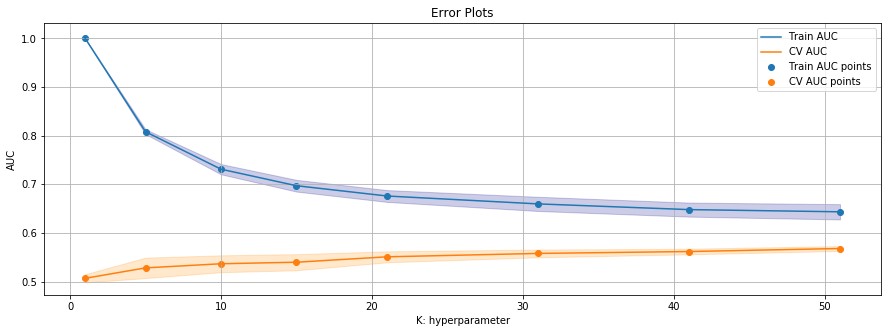

In [79]:
trainAUC = classifier.cv_results_['mean_train_score']
# cv_results_ : is an attribute of GridSearchCV
# cv_results_ : A dict with keys as column headers and values as columns
# contains keys like mean_train_score, mean_test_score, std_train_score etc where the corresponding val is a numpy array

trainAUCstd = classifier.cv_results_['std_train_score']

cvAUC = classifier.cv_results_['mean_test_score']
cvAUCstd = classifier.cv_results_['std_test_score']

plt.close()
plt.figure( figsize = ( 15, 5 ) )

plt.plot( parameters['n_neighbors'], trainAUC, label = 'Train AUC' )

plt.gca().fill_between( parameters['n_neighbors'], trainAUC - trainAUCstd, trainAUC + trainAUCstd, alpha=0.2, color='darkblue' )
# plt.gca() : gca() Get Current Axis, Get the current Axes instance on the current figure matching the given keyword args
# fill_between() : Fill the area between two horizontal curves.
# fill_between(x, y1, y2=0, <more param> ) : This creates one or multiple polygons describing the filled area.
# The curves are defined by the points (x, y1) and (x, y2)

# x : array i.e; parameters['neighbors'] here
# y1 : trainAUC - trainAUCstd,    y2 = cvAUC + cvAUCstd
# alpha : Set the alpha tranparencies of the collection. alpha must be a float or None.

plt.plot(parameters['n_neighbors'], cvAUC, label='CV AUC')

plt.gca().fill_between( parameters['n_neighbors'], cvAUC - cvAUCstd, cvAUC + cvAUCstd, alpha=0.2, color='darkorange')



plt.scatter( parameters['n_neighbors'], trainAUC, label='Train AUC points' )
plt.scatter( parameters['n_neighbors'], cvAUC, label='CV AUC points' )


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Error Plots")
plt.grid()
plt.show()

In [80]:
# We choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less

bestK = 51


In [81]:
def batchPredict( data, classifier ): # Predict the probablity of data points in batch i.e; some data points at once 
    
    yPred = []
    
    loop = data.shape[0] - data.shape[0] % 1000   # data.shape[0] : no of rows in data matrix
    # for ex data shape = 4489 then loop = 4489 - 4489%1000 = 4489 - 489 = 4000 
    # Now we can divide our loop into 4 interval of 1000s and one remaining 489
    # ie; 1-1000 in 1st iteration 1000-2000 in 2nd iteration 2000-3000 in 3rd 3000-4000 in 4th and 4000-4489 in the last iteraion
    
    for i in range( 0, loop, 1000 ):
        # If loop = 4000 Computes proba for 0 - 4000 in 4 iterations
       
        yPred.extend( classifier.predict_proba( data[i : i+1000] )[ :, 1] ) # [ :, 1] : All row Only 1 col
        # predict_proba : Return probability estimates for the test data X.

    yPred.extend( classifier.predict_proba( data[ loop : ] )[ :, 1 ] )
    # computes probab for remaining points

    return yPred

OR

In [82]:
def Predict( data, classifier ): # Predicts the probability of data points all at once
    
    yPred = []
        
    yPred.extend( classifier.predict_proba( data )[:, 1] )
    
    return yPred

We can use Predict as well as batch Predict

batchPredict() Predicts the data points in batches of 1000 whereas Predict() does it at once

Use Batch Prediction when dealing with large dataset and in case of memory Limitation<br><br>

In [83]:
## Understanding roc_curve()
import numpy as np
from sklearn import metrics

y = np.array([0, 0, 1, 1])    # Actual Label
scores = np.array([0.1, 0.4, 0.35, 0.8])  # Predicted Scores/ Probablistic Estimate

fpr, tpr, thresholds = metrics.roc_curve(y, scores)
# roc_curve() : Compute Receiver operating characteristic (ROC),
# this implementation is restricted to the binary classification task.
# If it isn't binary i.e; class labels are 1 and 2 there is a parameter called pos_label in roc_curve
# pos_label : Label considered as positive and others are considered negative. pos_label=2 means 2 is +ve 1 is -ve
# roc_curve( yTrue, yScore ) : yTrue = True Binary labels, yScore = Target values Probablistic estimate, confidence values etc
# The func returns 3 arrays : fpr = false Positive rates, tpr = True Positive rates, Threshold 

print( fpr )
print( tpr )
print( thresholds )

print( np.argmax( fpr*( 1 - tpr ) ) )   # argmax : Returns the indices of the maximum values along an axis.

t = thresholds[ np.argmax( fpr*( 1 - tpr ) ) ] 
print(t)

[0.  0.5 0.5 1. ]
[0.5 0.5 1.  1. ]
[0.8  0.4  0.35 0.1 ]
1
0.4


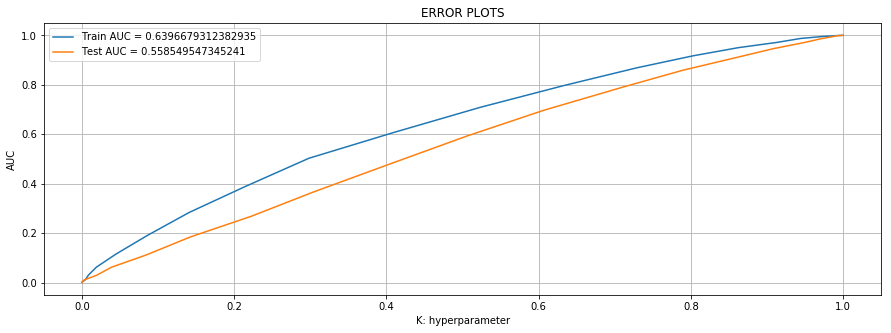

In [84]:
from sklearn.metrics import roc_curve, auc

neigh = KNeighborsClassifier( n_neighbors = bestK )
neigh.fit( xtr1, ytrain )

yTrainPred = Predict( xtr1, neigh )

yTestPred = Predict( xte1, neigh )

trFPR, trTPR, trThreshold = roc_curve( ytrain, yTrainPred ) # ytrain and YTrainPred must have same no. of points
teFPR, teTPR, teThreshold = roc_curve(ytest, yTestPred )

# roc_curve() : Compute Receiver operating characteristic (ROC),
# this implementation is restricted to the binary classification task.
# roc_curve( yTrue, yScore ) : yTrue = True Binary labels, yScore = Target values Probablistic estimate, confidence values etc
# The func returns 3 arrays : fpr = false Positive rates, tpr = True Positive rates, Threshold 

plt.figure( figsize = (15, 5) )
plt.plot( trFPR, trTPR, label="Train AUC = " + str( auc( trFPR, trTPR ) ) )
plt.plot( teFPR, teTPR, label="Test AUC = " + str( auc( teFPR, teTPR ) ) )

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [85]:
# Understanding Confusion Matrix
from sklearn.metrics import confusion_matrix

ytrue = [2, 0, 2, 2, 0, 1]  # Three class ;abels : 0, 1, 2 i.e; we will get a 3x3 Confusion Matrix 
ypred = [0, 0, 2, 2, 0, 2]

print( confusion_matrix( ytrue, ypred ) )

# Let Xab be : Data point X is actually 'a' but is Predicted to be 'b' => X01 data point X is 0 predicted to be 1

#            Actual->        0     1      2
# Predicted->           0   X00   X10    X20        X20 : X is actually 2 but is predicted 0 i;e False Predicted
#                       
#                       1   X01   X11    X21        # X00, X11, X22 are the only data points that are correctly predicted
#                       
#                       2   X02   X12    X22       # Our model is good if the diagonal values are high

[[2 0 0]
 [0 0 1]
 [1 0 2]]


In [86]:
def predictCM( probab, threshold, fpr, tpr ):
    
    t = threshold[ np.argmax( fpr*( 1 - tpr ) ) ]  # returns the threshold val for the point with max fpr(1-tpr) value
    # fpr*( 1 - tpr ) will be high if fpr is high and tpr is low, argmax : Returns the indices of the maximum val along an axis
    
    print(" The maximum value of tpr*(1-fpr) = ", max( tpr*(1-fpr) ), " for threshold = ", np.round(t,3))
    
    pred = []
    for i in probab: # i = Probaility for all data points
        if i >= t:   #  if Probablity of a point is >= the Threshold value i,e; Threshold at index of max val of fpr(1-tpr) 
            pred.append(1)
        else:
            pred.append(0)
            
    return pred

Confusion Matrix for Train 1 
 The maximum value of tpr*(1-fpr) =  0.3584081683748865  for threshold =  0.784
[[1224  850]
 [4474 6919]]


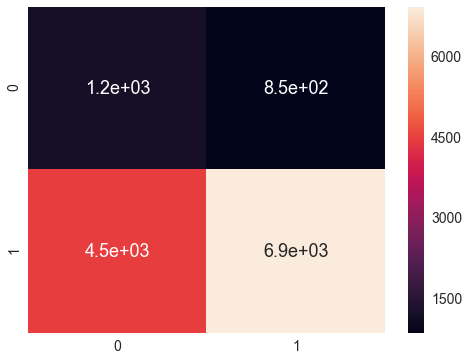



Confusion Matrix for Test 1 
 The maximum value of tpr*(1-fpr) =  0.2929364717396623  for threshold =  0.804
[[ 908  617]
 [4358 4017]]


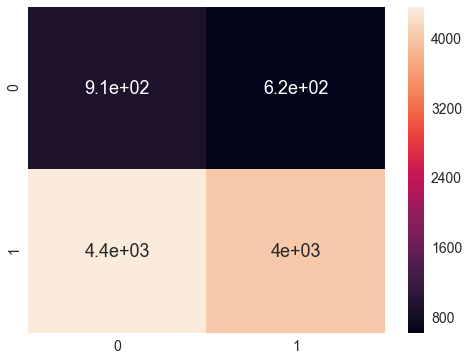

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sn


print("Confusion Matrix for Train 1 ")
predicted = predictCM( yTrainPred, trThreshold, trFPR, trTPR )

cmtr = confusion_matrix( ytrain, predicted )
print( cmtr  )

plt.figure( figsize = (8,6) )
sn.set( font_scale = 1.4 ) #for label size
sn.heatmap( cmtr, annot = True, annot_kws={"size": 18} )# font size
plt.show()
plt.close()



print("\n\nConfusion Matrix for Test 1 ")
predicted = predictCM( yTestPred, teThreshold, teFPR, teTPR )

cmte = confusion_matrix( ytest, predicted )
print( cmte )

plt.figure( figsize = (8,6) )
sn.set( font_scale = 1.4 ) #for label size
sn.heatmap( cmte, fmt=".3f" annot = True, annot_kws={"size": 18} )# font size
plt.show()
plt.close()

## Creating functions for Code reusability

### Function to Apply KNN on different K & finding best K using GridSearchCV() 

In [110]:
def BestK( x, y ):
    
    neigh = KNeighborsClassifier()

    parameters = { 'n_neighbors' : [ 1, 5, 10, 15, 21, 31, 41, 51 ] } 

    classifier = GridSearchCV( neigh, parameters, cv = 3, scoring = "roc_auc", n_jobs = -1 )
    # neigh : is the Estimator parameter for GridSearch 
    # paramaters : Dictionary with parameters names (string) as keys
    # scoring : A single string or a callable to evaluate the predictions on the test set. 
    # cv : No. of folds in cross validation. cv = 3 means data divided into 3 parts each time 1 part is used for test

    classifier.fit( x, y )
    
    xAUC = classifier.cv_results_['mean_train_score']
    # cv_results_ : is an attribute of GridSearchCV
    # cv_results_ : A dict with keys as column headers and values as columns
    # contains keys like mean_train_score, mean_test_score, std_train_score etc where the corresponding val is a numpy array

    xAUCstd = classifier.cv_results_['std_train_score']

    cvAUC = classifier.cv_results_['mean_test_score']
    cvAUCstd = classifier.cv_results_['std_test_score']

    plt.close()
    plt.figure( figsize = ( 15, 5 ) )

    plt.plot( parameters['n_neighbors'], xAUC, label = 'Train AUC' )

    plt.gca().fill_between( parameters['n_neighbors'], xAUC - xAUCstd, xAUC + xAUCstd, alpha=0.2, color='darkblue' )
    # plt.gca() : gca() Get Current Axis, Get the current Axes instance on the current figure matching the given keyword args
    # fill_between() : Fill the area between two horizontal curves.
    # fill_between(x, y1, y2=0, <more param> ) : This creates one or multiple polygons describing the filled area.
    # The curves are defined by the points (x, y1) and (x, y2)

    # x : array i.e; parameters['neighbors'] here
    # y1 : trainAUC - trainAUCstd,    y2 = cvAUC + cvAUCstd
    # alpha : Set the alpha tranparencies of the collection. alpha must be a float or None.

    plt.plot(parameters['n_neighbors'], cvAUC, label='CV AUC')

    plt.gca().fill_between( parameters['n_neighbors'], cvAUC - cvAUCstd, cvAUC + cvAUCstd, alpha=0.2, color='darkorange')



    plt.scatter( parameters['n_neighbors'], xAUC, label='Train AUC points' )
    plt.scatter( parameters['n_neighbors'], cvAUC, label='CV AUC points' )


    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("Error Plots")
    plt.grid()
    plt.show()


### <br>Function to convert Predicted Score to Binary and creating Confusion Matrix

In [111]:
def predictCM( probab, threshold, fpr, tpr ):
    
    t = threshold[ np.argmax( fpr*( 1 - tpr ) ) ]  # returns the threshold val for the point with max fpr(1-tpr) value
    # fpr*( 1 - tpr ) will be high if fpr is high and tpr is low, argmax : Returns the indices of the maximum val along an axis
    
    print(" The maximum value of tpr*(1-fpr) = ", max( tpr*(1-fpr) ), " for threshold = ", np.round(t,3))
    
    pred = []
    for i in probab: # i = Probability for all data points
        if i >= t:   #  if Probablity of a point is >= the Threshold value i,e; Threshold at index of max val of fpr(1-tpr) 
            pred.append(1)
        else:
            pred.append(0)
            
    return pred

In [115]:
def cm( ytr, yte, yTrainPred, trThreshold, trFPR, trTPR, yTestPred, teThreshold, teFPR, teTPR, sno ):
    
    print("Confusion Matrix for Train of Set ", sno)
    
    predicted = predictCM( yTrainPred, trThreshold, trFPR, trTPR )
    cmtr = confusion_matrix( ytr, predicted )
    print( cmtr  )

    plt.figure( figsize = (8,6) )
    sn.set( font_scale = 1.4 ) #for label size
    sn.heatmap( cmtr,fmt=".3f" annot = True, annot_kws={"size": 18} )# font size
    plt.show()
    plt.close()



    print("\n\nConfusion Matrix for Test 1 ")
    predicted = predictCM( yTestPred, teThreshold, teFPR, teTPR )

    cmte = confusion_matrix( yte, predicted )
    print( cmte )

    plt.figure( figsize = (8,6) )
    sn.set( font_scale = 1.4 ) #for label size
    sn.heatmap( cmte,fmt=".3f" annot = True, annot_kws={"size": 18} )# font size
    plt.show()
    plt.close()

### <br>Function to Predict probabilistic score and appling roc_curve()

In [116]:
def Predict( data, classifier ): # Predicts the probability of data points all at once
    
    yPred = []
        
    yPred.extend( classifier.predict_proba( data )[:, 1] )
    return yPred

In [117]:
def roc( xtr, xte, ytr, yte, bestK, sno ):
    
    neigh = KNeighborsClassifier( n_neighbors = bestK )
    neigh.fit( xtr, ytr )

    yTrainPred = Predict( xtr, neigh )    
    yTestPred = Predict( xte, neigh )

    trFPR, trTPR, trThreshold = roc_curve( ytr, yTrainPred ) # ytrain and YTrainPred must have same no. of points
    teFPR, teTPR, teThreshold = roc_curve(yte, yTestPred )

    # roc_curve() : Compute Receiver operating characteristic (ROC),
    # this implementation is restricted to the binary classification task.
    # roc_curve( yTrue, yScore ) : yTrue = True Binary labels, yScore = Target values Probablistic estimate, confidence values etc
    # The func returns 3 arrays : fpr = false Positive rates, tpr = True Positive rates, Threshold 

    plt.figure( figsize = (15, 5) )
    plt.plot( trFPR, trTPR, label="Train AUC = " + str( auc( trFPR, trTPR ) ) )
    plt.plot( teFPR, teTPR, label="Test AUC = " + str( auc( teFPR, teTPR ) ) )

    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS for Set "+str(sno))
    plt.grid()
    plt.show()
    
    
    cm( ytr, yte, yTrainPred, trThreshold, trFPR, trTPR, yTestPred, teThreshold, teFPR, teTPR, sno )

# Operations on Set 2  TFIDF

### Selecting Top 2K features from Set 2 

In [118]:
from sklearn.feature_selection import SelectKBest, chi2

# Select features according to the k highest scores.

topFeatures = SelectKBest( score_func = chi2, k = 2000 )
# score_func : Score func which is applied to a pair of features X and label Y, It returns an array of scores 1 for each feature
# then SelectKBest simply retains the first k features of dataset X with the highest scores.
# k = no. of top features to be retained
# chi2 : compute the chi2 statistic between each feature of X and Y a small val means the feature is independant of Y 

xtr2Top2k = topFeatures.fit_transform( xtr2, ytrain )  

print( xtr2.shape )
print( xtr2Top2k.shape )

xte2Top2k = topFeatures.fit_transform( xte2, ytest )

xte2Top2k.shape

(13467, 7878)
(13467, 2000)


(9900, 2000)

### Finding best k & plotting roc_curve() & creating confusion_matrix

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


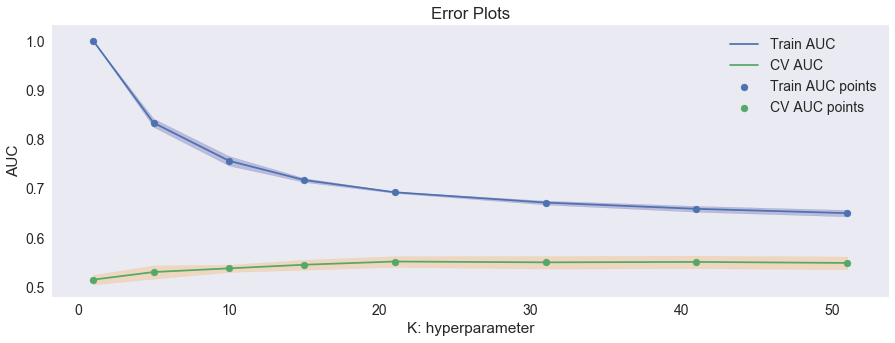

In [119]:
BestK( xtr2Top2k, ytrain )

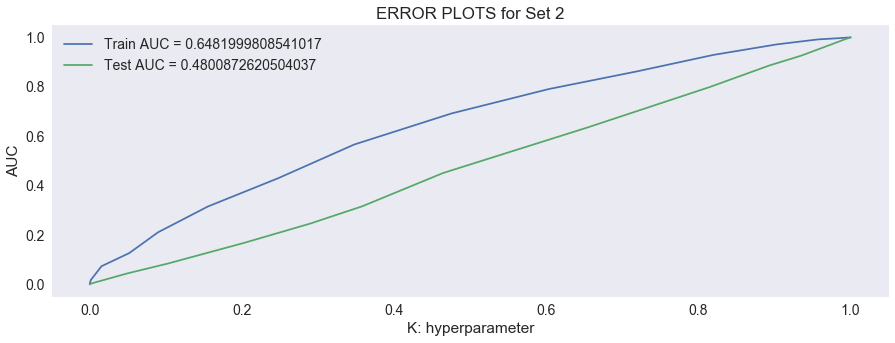

Confusion Matrix for Train of Set  2
 The maximum value of tpr*(1-fpr) =  0.36949844263945586  for threshold =  0.843
[[1353  721]
 [4940 6453]]


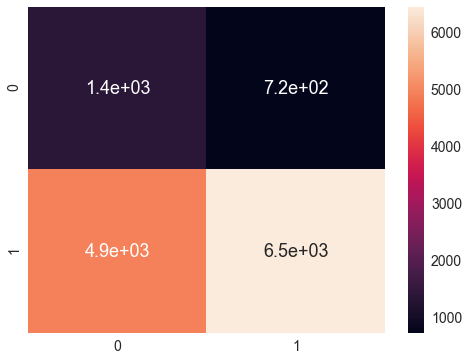



Confusion Matrix for Test 1 
 The maximum value of tpr*(1-fpr) =  0.2415457401517005  for threshold =  0.843
[[ 817  708]
 [4599 3776]]


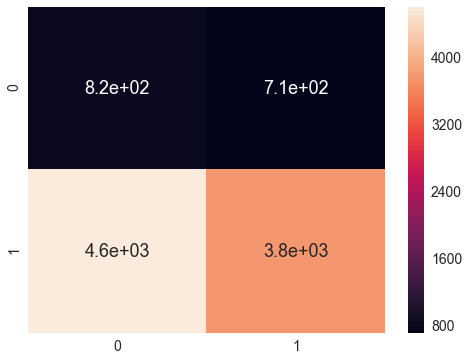

In [120]:
bestK = 51

roc( xtr2Top2k, xte2Top2k, ytrain, ytest, bestK, 2 )


# Operations on set 3 Avg w2v

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


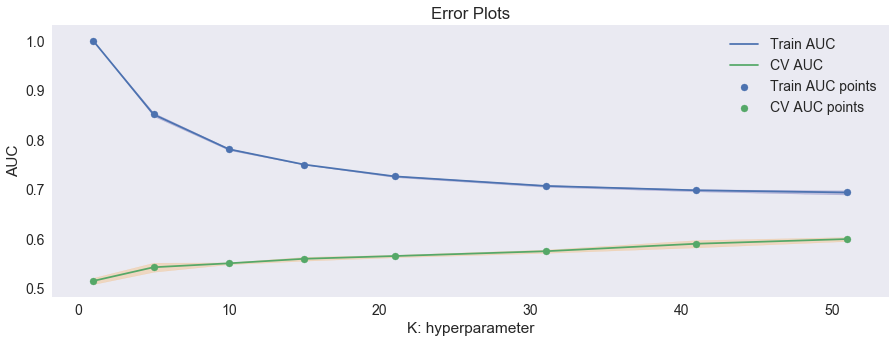

In [121]:
BestK( xtr3, ytrain )

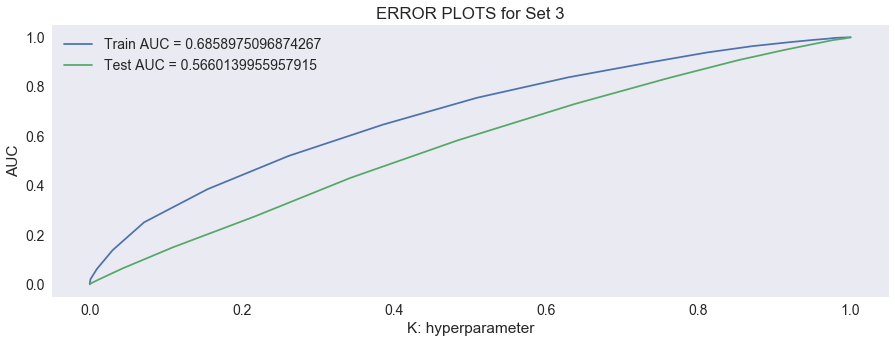

Confusion Matrix for Train of Set  3
 The maximum value of tpr*(1-fpr) =  0.3975694019767675  for threshold =  0.863
[[1275  799]
 [4025 7368]]


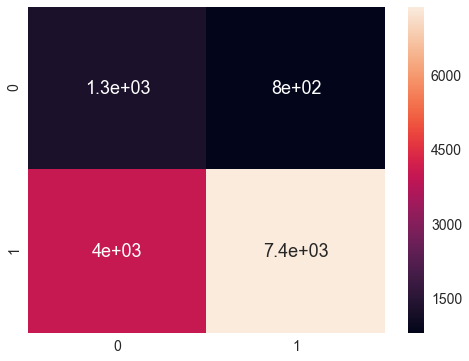



Confusion Matrix for Test 1 
 The maximum value of tpr*(1-fpr) =  0.3011358160019574  for threshold =  0.882
[[ 787  738]
 [3488 4887]]


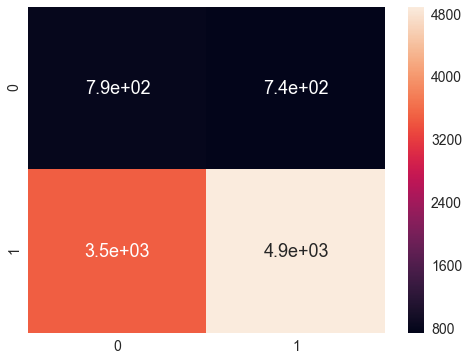

In [122]:
bestK = 51

roc( xtr3, xte3, ytrain, ytest, bestK, 3 )

# Operations on set 4 Weighted w2v

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


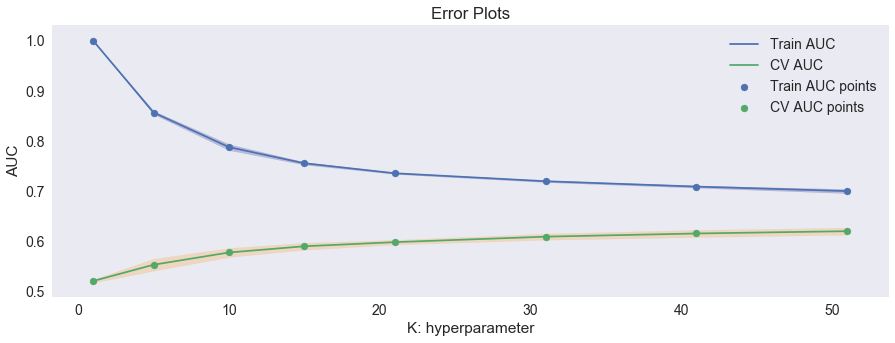

In [123]:
BestK( xtr4, ytrain )

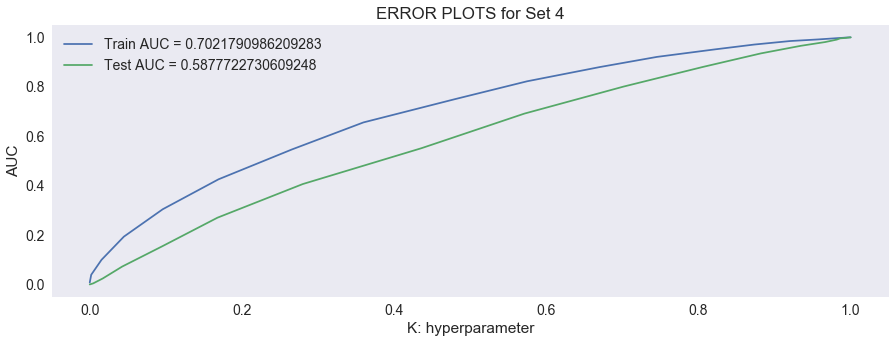

Confusion Matrix for Train of Set  4
 The maximum value of tpr*(1-fpr) =  0.4198846150688376  for threshold =  0.863
[[1328  746]
 [3922 7471]]


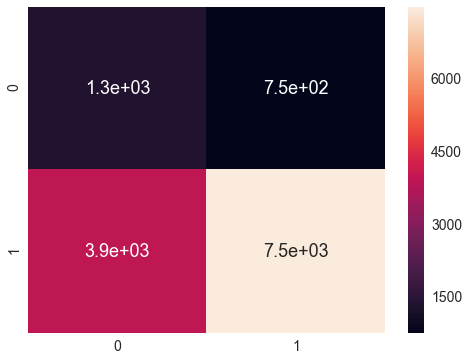



Confusion Matrix for Test 1 
 The maximum value of tpr*(1-fpr) =  0.31102246146317586  for threshold =  0.882
[[ 860  665]
 [3756 4619]]


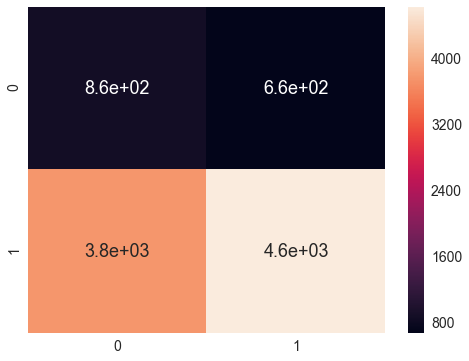

In [124]:
bestK = 51

roc( xtr4, xte4, ytrain, ytest, bestK, 4 )

In [125]:
from prettytable import PrettyTable
    
x = PrettyTable()


x.field_names = [" Vectorizer ", " GridSearchCV() ", " Best K ", " Train AUC ", " Test AUC "]

x.add_row( [ " B.O.W ", " Brute ", " 51 ", " 0.6396 ", " 0.5484 " ] ) 
x.add_row( [ " TFIDF ", " Brute ", " 41 ", " 0.6481  ", " 0.4800 " ] )
x.add_row( [ " Avg W2V ", " Brute ", " 51 ", " 0.6858 ", " 0.5660 " ] )
x.add_row( [ " WW2V ", " Brute ", " 51 ", " 0.7021  ", " 0.5877 " ] )

print( x )

# Ref : http://zetcode.com/python/prettytable/

+--------------+------------------+----------+-------------+------------+
|  Vectorizer  |  GridSearchCV()  |  Best K  |  Train AUC  |  Test AUC  |
+--------------+------------------+----------+-------------+------------+
|    B.O.W     |      Brute       |    51    |    0.6396   |   0.5484   |
|    TFIDF     |      Brute       |    41    |   0.6481    |   0.4800   |
|   Avg W2V    |      Brute       |    51    |    0.6858   |   0.5660   |
|     WW2V     |      Brute       |    51    |   0.7021    |   0.5877   |
+--------------+------------------+----------+-------------+------------+


## Conclusions

There are some missing values in teacher_prefix column

Weighted Word to Vec approach gives the best result in Train AUC 

Out of all the other approaches Weighted Word to Vec approach has the highest Test AUC